## Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings


%matplotlib inline
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2)

warnings.filterwarnings('ignore')

## Data Understanding

### About Dataset: https://www.kaggle.com/code/lakshmi25npathi/bike-rental-count-prediction-using-python/input
Questions:
<ul>
    <li>Make Profit Feature.</li>
    <ul>
        <li>Each registerd user rent bike for 5 USD/day.</li>
        <li>Casual user rent bike for 20 USD/day.</li>
        <li>Taxes 0.14%.</li>
        <li> Maintance 1500/year.</li>
    </ul>
    <li>Distribution rented_bikes_count & profit.</li>
    <li>Profit for each day.</li>
    <li>Which season that has more registeration & profit.</li>
    <li>Which weather condition that has more registeration & profit.</li>
    <li>Correlation beween profit & bikes count with all features.</li>
    <li>Rentals during rush hours (7-9 am & 3-5 pm).</li>
    <li>Rentals during workday & holiday.</li>
    <li>Registered or casual is more.</li>
    <li>What is the average of bikes would be registered during the week.</li>
    <li>Schools (9-12) & (2-6) profit.</li>
    </ul>

## Loading dataset

In [2]:
df = pd.read_csv('../dataset/bikes.csv')
df

,datetime,season,hour,holiday,workingday,weather,temp,hum,windspeed,casual,registered,rented_bikes_count
0,01/01/2011,1,0,0,0,1,0.24,0.81,0.0000,3,13,16
1,01/01/2011,1,1,0,0,1,0.22,0.80,0.0000,8,32,40
2,01/01/2011,1,2,0,0,1,0.22,0.80,0.0000,5,27,32
3,01/01/2011,1,3,0,0,1,0.24,0.75,0.0000,3,10,13
4,01/01/2011,1,4,0,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31/12/2012,1,19,0,1,2,0.26,0.60,0.1642,11,108,119
17375,31/12/2012,1,20,0,1,2,0.26,0.60,0.1642,8,81,89
17376,31/12/2012,1,21,0,1,1,0.26,0.60,0.1642,7,83,90
17377,31/12/2012,1,22,0,1,1,0.26,0.56,0.1343,13,48,61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            17379 non-null  object 
 1   season              17379 non-null  int64  
 2   hour                17379 non-null  int64  
 3   holiday             17379 non-null  int64  
 4   workingday          17379 non-null  int64  
 5   weather             17379 non-null  int64  
 6   temp                17379 non-null  float64
 7   hum                 17379 non-null  float64
 8   windspeed           17379 non-null  float64
 9   casual              17379 non-null  int64  
 10  registered          17379 non-null  int64  
 11  rented_bikes_count  17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,season,hour,holiday,workingday,weather,temp,hum,windspeed,casual,registered,rented_bikes_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df.isna().any()

datetime              False
season                False
hour                  False
holiday               False
workingday            False
weather               False
temp                  False
hum                   False
windspeed             False
casual                False
registered            False
rented_bikes_count    False
dtype: bool

In [6]:
df.duplicated().any()

False

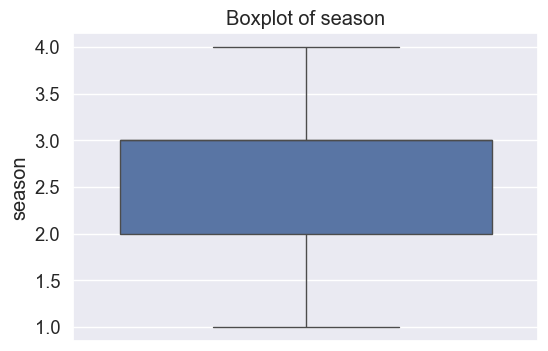

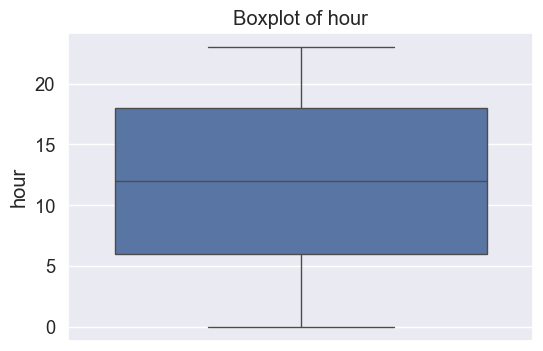

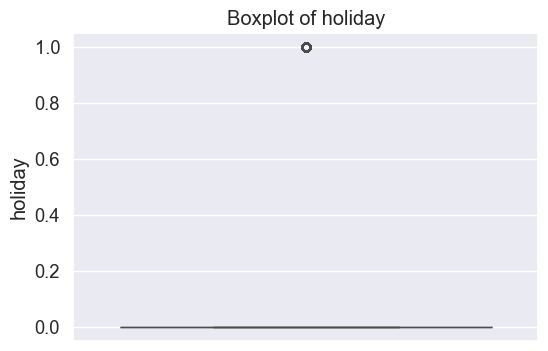

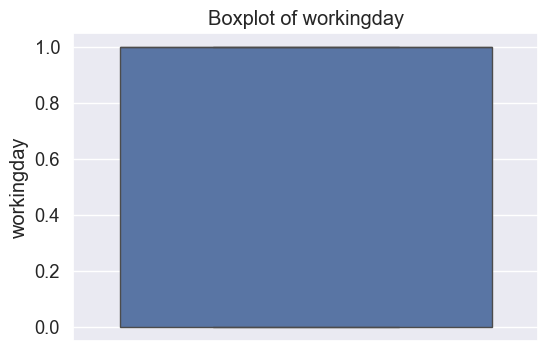

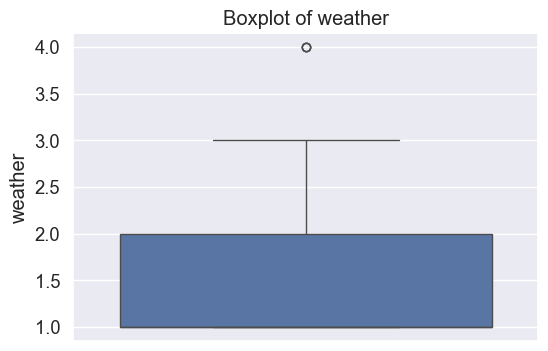

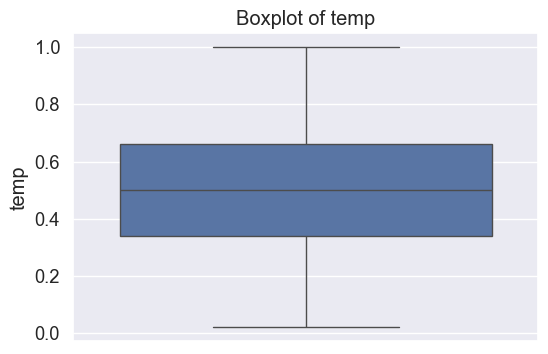

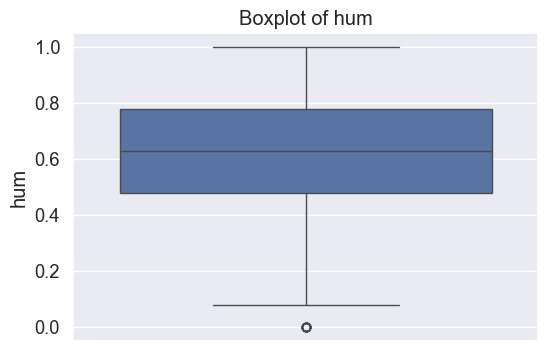

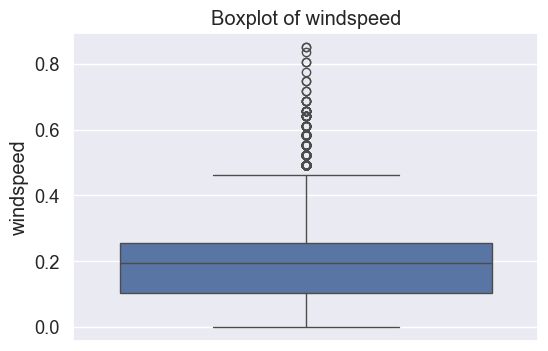

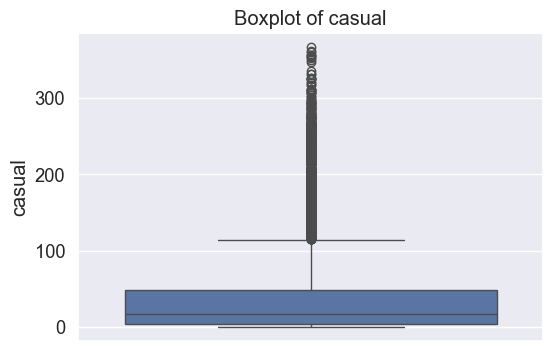

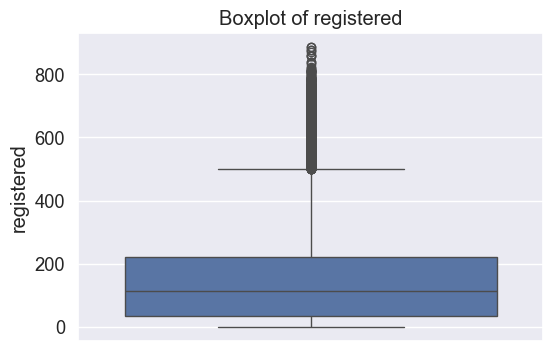

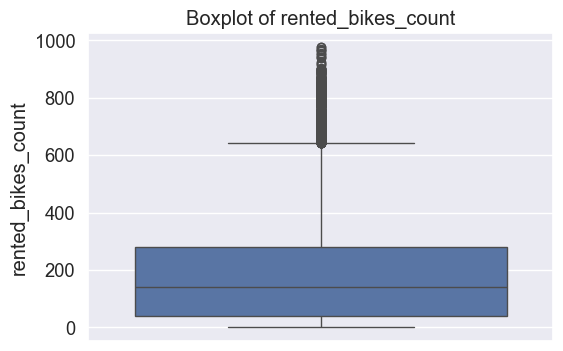

In [7]:
num_df = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_df:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [8]:
df.columns

Index(['datetime', 'season', 'hour', 'holiday', 'workingday', 'weather',
       'temp', 'hum', 'windspeed', 'casual', 'registered',
       'rented_bikes_count'],
      dtype='object')

In [9]:
idx = ds.structdata.detect_outliers(df,0,['weather', 'windspeed', 'windspeed','casual', 'hum', 'rented_bikes_count'])
outliers = df.iloc[idx]
df = df.drop(idx, axis = 0)

In [10]:
df

,datetime,season,hour,holiday,workingday,weather,temp,hum,windspeed,casual,registered,rented_bikes_count
0,01/01/2011,1,0,0,0,1,0.24,0.81,0.0000,3,13,16
1,01/01/2011,1,1,0,0,1,0.22,0.80,0.0000,8,32,40
2,01/01/2011,1,2,0,0,1,0.22,0.80,0.0000,5,27,32
3,01/01/2011,1,3,0,0,1,0.24,0.75,0.0000,3,10,13
4,01/01/2011,1,4,0,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31/12/2012,1,19,0,1,2,0.26,0.60,0.1642,11,108,119
17375,31/12/2012,1,20,0,1,2,0.26,0.60,0.1642,8,81,89
17376,31/12/2012,1,21,0,1,1,0.26,0.60,0.1642,7,83,90
17377,31/12/2012,1,22,0,1,1,0.26,0.56,0.1343,13,48,61


<Axes: >

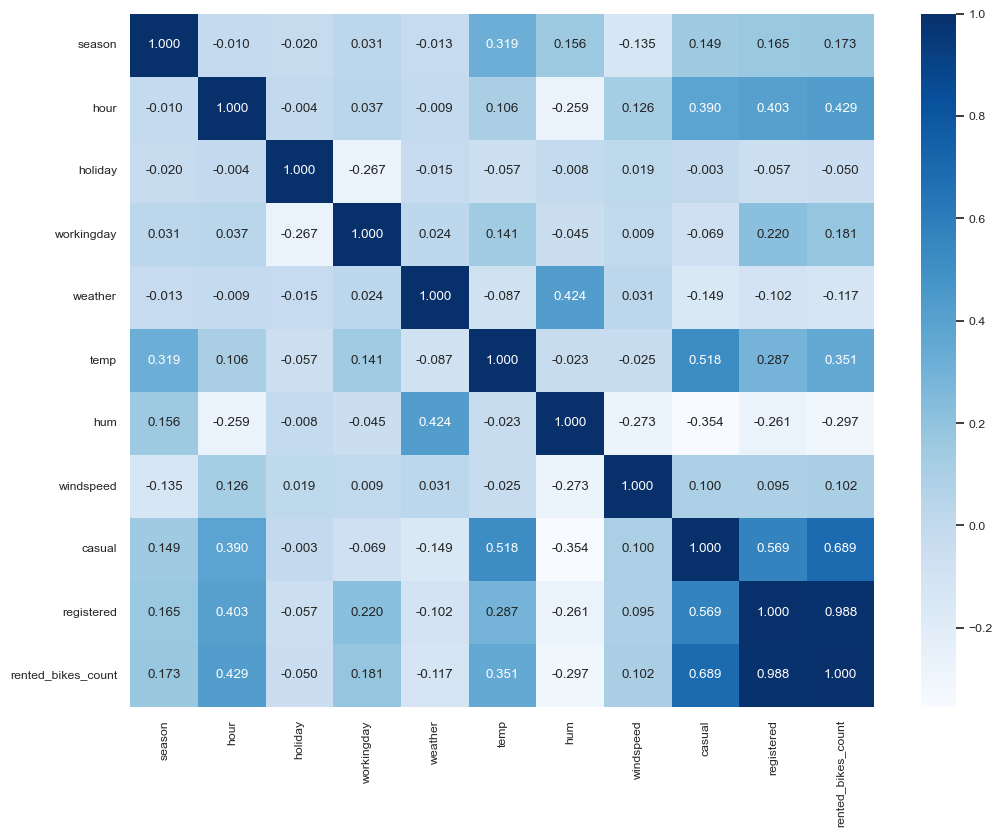

In [11]:
sns.set(rc={'figure.figsize':[12,9]},font_scale=0.8)
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap= 'Blues', fmt='.3f')

In [12]:
corr_matrix = df.corr(numeric_only = True)
corr_stacked = corr_matrix.stack()
high_corr_pairs = corr_stacked[(corr_stacked > 0.8) & (corr_stacked < 1.0)]
columns_above_threshold = pd.Index(high_corr_pairs.index.get_level_values(0).unique())

columns_above_threshold

Index(['registered', 'rented_bikes_count'], dtype='object')

In [14]:
df.drop(['registered', 'windspeed'], inplace= True, axis=1)

In [20]:
df['datetime'][5]

Timestamp('2011-01-01 00:00:00')

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y')
df

,datetime,season,hour,holiday,workingday,weather,temp,hum,casual,rented_bikes_count
0,2011-01-01,1,0,0,0,1,0.24,0.81,3,16
1,2011-01-01,1,1,0,0,1,0.22,0.80,8,40
2,2011-01-01,1,2,0,0,1,0.22,0.80,5,32
3,2011-01-01,1,3,0,0,1,0.24,0.75,3,13
4,2011-01-01,1,4,0,0,1,0.24,0.75,0,1
...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,1,2,0.26,0.60,11,119
17375,2012-12-31,1,20,0,1,2,0.26,0.60,8,89
17376,2012-12-31,1,21,0,1,1,0.26,0.60,7,90
17377,2012-12-31,1,22,0,1,1,0.26,0.56,13,61


In [22]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.drop('datetime', axis=1, inplace=True)
df

,season,hour,holiday,workingday,weather,temp,hum,casual,rented_bikes_count,year,month,day
0,1,0,0,0,1,0.24,0.81,3,16,2011,1,1
1,1,1,0,0,1,0.22,0.80,8,40,2011,1,1
2,1,2,0,0,1,0.22,0.80,5,32,2011,1,1
3,1,3,0,0,1,0.24,0.75,3,13,2011,1,1
4,1,4,0,0,1,0.24,0.75,0,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,2,0.26,0.60,11,119,2012,12,31
17375,1,20,0,1,2,0.26,0.60,8,89,2012,12,31
17376,1,21,0,1,1,0.26,0.60,7,90,2012,12,31
17377,1,22,0,1,1,0.26,0.56,13,61,2012,12,31


In [24]:
x = df.drop(['rented_bikes_count'],axis = 1)
y = df['rented_bikes_count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Logistic Regression': LinearRegression(n_jobs=1000), 
    'XGBoost': XGBRegressor(eval_metric='mlogloss')  
}

param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5],
        'min_samples_split': [20],
        'min_samples_leaf': [5]
    },
    'Random Forest': {
        'n_estimators': [40,70],
        'max_depth': [5, 8],
        'min_samples_split': [15],
        'max_features': ['sqrt']
    },
    'Gradient Boosting': {
        'n_estimators': [30, 40],
        'learning_rate': [0.01, 0.03],
        'subsample': [0.8]
    },
    'Logistic Regression': {
        'C': [0.5912, 0.6, 0.61],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },

    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'colsample_bytree': [0.8, 1.0]
    }
}

scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler(),
    'Standard Scaler': StandardScaler()
}

In [50]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(n_jobs=1000), 
    'XGBoost': XGBRegressor(eval_metric='rmse')  
}

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'criterion': ['squared_error', 'absolute_error'], 
        'max_depth': [5],
        'min_samples_split': [20],
        'min_samples_leaf': [5]
    },
    'Random Forest': {
        'n_estimators': [40, 70],
        'max_depth': [5, 8],
        'min_samples_split': [15],
        'max_features': ['sqrt']
    },
    'Gradient Boosting': {
        'n_estimators': [30, 40],
        'learning_rate': [0.01, 0.03],
        'subsample': [0.8]
    },
    'Linear Regression': {
        'fit_intercept': [True, False]  # Removed 'normalize' parameter
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'colsample_bytree': [0.8, 1.0]
    }
}

best_models = {}
best_params = {}
metrics_results = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    # Adjust scoring for regression
    scoring_metric = 'r2'  # R² is used for GridSearchCV

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=2,
        scoring=scoring_metric,  # R² will be used as the main scoring metric
        verbose=2,
        error_score='raise'
    )
    
    try:
        # Fit the model using GridSearchCV
        grid_search.fit(x_train, y_train)

        # Store the best model, parameters, and score
        best_models[model_name] = grid_search.best_estimator_
        best_params[model_name] = grid_search.best_params_

        # Evaluate the model on the test data
        y_pred = grid_search.predict(x_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Store metrics
        metrics_results[model_name] = {
            'R^2': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        }

        # Print the metrics for each model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Metrics for {model_name}:")
        print(f"R^2: {r2:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}\n")

        # Store GridSearchCV results
        grid_search_results[model_name] = grid_search.cv_results_

    except Exception as e:
        print(f"Error encountered for {model_name}: {e}\n")


Running GridSearchCV for Decision Tree: 
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.6s
[CV] END criterion=absolute_error, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.5s
Best parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Metrics for Decision Tree:
R^2: 0.7530
MAE: 45.9472
MSE: 5067.8841
RMSE: 71.1891

Running GridSearchCV for Random Forest: 
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_sp

In [29]:
best_params = {
    'Decision Tree': {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20},
    'Random Forest': {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 70},
    'Gradient Boosting': {'learning_rate': 0.03, 'n_estimators': 40, 'subsample': 0.8},
    'Linear Regression': {'fit_intercept': True},
    'XGBoost': {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100},
}

results_df= {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeRegressor(random_state=38, **best_params['Decision Tree']),
    'Random Forest': RandomForestRegressor(random_state=38, **best_params['Random Forest']),
    'Gradient Boosting': GradientBoostingRegressor(random_state=38, **best_params['Gradient Boosting']),
    'Linear Regression': LinearRegression( **best_params['Linear Regression']),
    'XGBoost': XGBRegressor(eval_metric='mlogloss',**best_params['XGBoost'])

}

scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler(),
    'Standard Scaler': StandardScaler()
}

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils.multiclass import type_of_target

def evaluate_models(models, scalers, x_train, y_train, x_test, y_test):
    results = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}
    results_df= {"Model": [], "Scaler": [], "Train R2 Score": [], "Test R2 Score": []}

    for model_name, model in models.items():
        for scaler_name, scaler in scalers.items():
            x_train_scaled = scaler.fit_transform(x_train)
            x_test_scaled = scaler.transform(x_test)

            model.fit(x_train_scaled, y_train)
            y_train_pred = model.predict(x_train_scaled)
            y_test_pred = model.predict(x_test_scaled)

            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            results_df["Model"].append(model_name)
            results_df["Scaler"].append(scaler_name)
            results_df["Train R2 Score"].append(train_r2)
            results_df["Test R2 Score"].append(test_r2)
            results[model_name][scaler_name]['y_true'] = y_test
            results[model_name][scaler_name]['y_pred'] = y_test_pred

    return results, results_df

def plot_confusion_matrices(results, models, scalers, y_test):
    num_models = len(models)
    num_scalers = len(scalers)

    fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

    for i, (model_name, _) in enumerate(models.items()):
        for j, (scaler_name, _) in enumerate(scalers.items()):
            ax = axes[i, j]
            y_true = results[model_name][scaler_name]['y_true']
            y_pred = results[model_name][scaler_name]['y_pred']

results, results_df = evaluate_models(models, scalers, x_train, y_train, x_test, y_test)

In [31]:
pd.DataFrame(results_df)

,Model,Scaler,Train R2 Score,Test R2 Score
0,Decision Tree,Min-Max Scaler,0.762540,0.752962
1,Decision Tree,Robust Scaler,0.762540,0.752962
2,Decision Tree,Standard Scaler,0.762540,0.752962
3,Random Forest,Min-Max Scaler,0.823776,0.800506
4,Random Forest,Robust Scaler,0.823766,0.800496
5,Random Forest,Standard Scaler,0.823772,0.800429
6,Gradient Boosting,Min-Max Scaler,0.603078,0.589552
7,Gradient Boosting,Robust Scaler,0.603078,0.589552
8,Gradient Boosting,Standard Scaler,0.603078,0.589552
9,Linear Regression,Min-Max Scaler,0.579044,0.565015


In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 1007.9908
Mean Absolute Error: 19.6358
R² Score: 0.9509
